# STAT 345: Nonparametric Statistics

## Lesson 07.2: The Kolmagorov Test

**Reading: Conover Section 6.1**

*Prof. John T. Whelan*

Tuesday 18 March 2025

These lecture slides are in a computational notebook.  You have access to them through http://vmware.rit.edu/

Flat HTML and slideshow versions are also in MyCourses.

The notebook can run Python commands (other notebooks can use R or Julia; "Ju-Pyt-R").  Think: computational data analysis, not "coding".

Standard commands to activate inline interface and import libraries:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

Consider the question: could a sample $\{x_i\}$ reasonably have come from a particular distribution?

E.g., consider data with the following histogram:

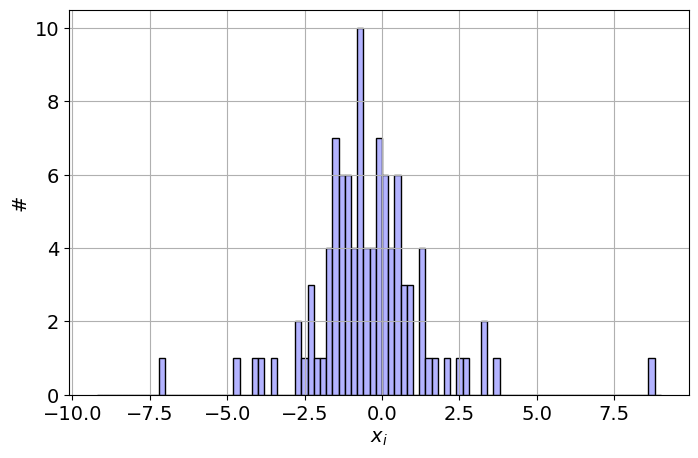

In [3]:
x_i = np.array([-0.6106, -0.2310, -1.0372, -2.1245, 0.7290, 0.0136, -1.4146, -1.0677, -2.6589,  0.0709, 0.7706, 3.7948, -1.4862, -0.0701, -1.3513, -0.8655, -0.2769, -0.5387, 0.2276, -0.0120, -3.8585, 0.0835, -1.7957, 1.0703, -0.6074, -0.8175, -0.9521, 0.6801, 2.5205, 0.1078, -1.2938, -0.6855, -2.1204, -0.3684, -0.4298, -1.2256, 1.3653, -2.2061, -1.6217, -2.3376,    -1.1890, -1.9026, 0.3447, 2.7895, -0.5585, 1.6562, -3.4243, -0.9751,0.6078, -0.6654, -1.5980, 0.0568, 1.0073, -4.0373, -1.1408, 1.3027,-0.0781, 2.2652, -2.5808, 0.5551, 1.7056, 0.6155, 0.3708, -0.7449,0.7294, -1.6789, 0.2668, 1.3637, -1.1435, -4.5174, 0.1851, -0.4093,-0.1503, 0.4865, -0.7953, -1.6489, -0.5183, 0.6161, -0.5087, -1.3621,3.3161, 0.3884, -1.0508, 0.5203, 0.2696, -1.4678, -1.4626, 0.9397,-7.0490, -0.6900, 3.3881, -0.6778, -1.4596, 0.1268, 8.7628, -1.0302,1.3928, -0.4755, -0.1050, -1.2061 ])
xmax = np.ceil(max(np.abs(x_i)))+0.1; xmin = -xmax
myhist,mybins = np.histogram(x_i,bins=np.arange(xmin,xmax+0.1,0.2));mywidths=mybins[1:]-mybins[:-1]
plt.bar(mybins[:-1],myhist,mywidths,color='b',ec='k',fc=[0.7,0.7,1.0]);
plt.xlabel(r'$x_i$');plt.ylabel('#');plt.grid();

Since the data were not drawn from a normal distribution (as evidenced
by the long tails), the $t$-test turns out to be less powerful than the sign test in this case:

In [4]:
n = len(x_i); xbar = np.mean(x_i); s = np.std(x_i,ddof=1); n, xbar, s

(100, -0.34903799999999996, 1.8575830646778027)

In [5]:
t = xbar/(s/np.sqrt(n));print('t-test has t=%g, p-value=%g' %(t,2*stats.t(df=n-1).cdf(t)))

t-test has t=-1.87899, p-value=0.0631875


In [6]:
nplus = np.sum(x_i>0); npm = np.sum(x_i!=0)
print("%d out of %d values positive, so sign test has p-value=%g"%(nplus,npm,2.*stats.binom(npm,0.5).cdf(nplus)))

39 out of 100 values positive, so sign test has p-value=0.0352002


The $t$-test has a two-sided $p$-value of $0.063$, while that for the sign test is $0.035$.

But how does one quantify how different a data sample looks from the expectation under some hypothesized distribution (normal or otherwise)? That is the topic of the tests we consider now, starting with variants of the Kolmogorov-Smirnov test.

# The Kolmogorov Test

## Test Statistic(s)

- Could compare the histogram to the hypothesized pdf, but this involves a choice of binning. Instead use *cumulative* distribution. Compare the true cdf $F(x)=P(\color{royalblue}{X}\mathbin{\le}x)$ to hypothesized cdf $F^*(x)$.

- The null hypothesis
$H_0$ is that $F(x)=F^*(x)$ for all $x$. The alternative hypothesis can
be:
  + Two-sided: $F(x)\ne F^*(x)$ for some (unspecified) $x$
  + One-sided: $F(x)< F^*(x)$ for some (unspecified) $x$
  + One-sided: $F(x)> F^*(x)$ for some (unspecified) $x$

- Empirical cdf $\hat{F}(x;\{x_i\})$ (Conover calls $S(x)$): fraction of
sample values w/$x_i\le x$ for each $x$
$$\hat{F}(x;\{x_i\}) = \frac{1}{n}\sum_{i=1}^n I[x_i\le x]$$

- We use as
test statistics the maximum separation between the curves
$\hat{F}(x;\{x_i\})$ and $F^*(x)$:
$$\begin{gathered}
    T^{+} = \sup_x[F^*(x)-\hat{F}(x;\{x_i\})] \quad\hbox{and}\quad
    T^{-} = \sup_x[\hat{F}(x;\{x_i\})-F^*(x)] \\
    T = \max(T^{+},T^{-}) = \sup_x{\left\lvert F^*(x)-\hat{F}(x;\{x_i\})\right\rvert}
  \end{gathered}$$

We can illustrate this for a particular sample of data, under the null
hypothesis that they are drawn from a standard normal distribution,
plotting the empirical and hypthesized distributions:

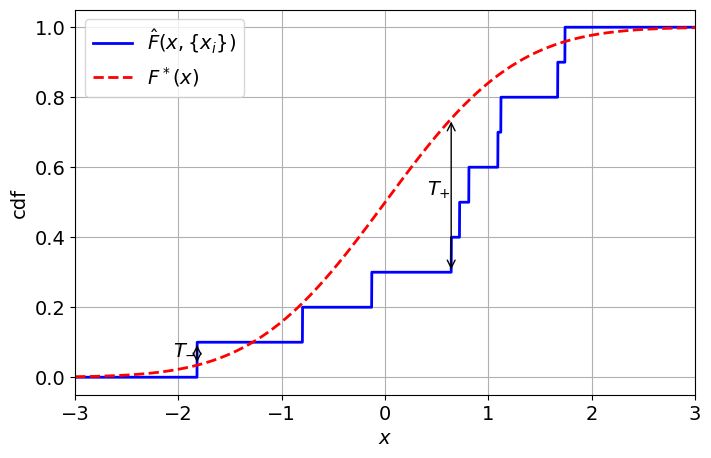

In [7]:
x_i = np.array([-1.82, 0.72, 1.67, 1.09, 0.64, 0.81, 1.74, -0.80, -0.13, 1.12]);
xmin = -3; xmax = 3; x_x = np.linspace(xmin,xmax,6001);
Fhat_x = np.mean(x_i[None,:] <= x_x[:,None],axis=-1); Fstar_x = stats.norm.cdf(x_x)
xp = np.argmax(Fstar_x-Fhat_x); xm = np.argmax(Fhat_x-Fstar_x)
plt.plot(x_x,Fhat_x,'b-',lw=2,label=r'$\hat{F}(x,\{x_i\})$'); plt.plot(x_x,Fstar_x,'r--',lw=2,label=r'$F^*(x)$');
plt.text(x_x[xp],(Fstar_x+Fhat_x)[xp]/2,r'$T_{+}$',ha='right');plt.annotate('',xy=(x_x[xp],Fstar_x[xp]),xycoords='data',xytext=(x_x[xp],Fhat_x[xp]),textcoords='data',arrowprops=dict(arrowstyle='<->'));
plt.text(x_x[xm],(Fstar_x+Fhat_x)[xm]/2,r'$T_{-}$',ha='right');plt.annotate('',xy=(x_x[xm],Fstar_x[xm]),xycoords='data',xytext=(x_x[xm],Fhat_x[xm]),textcoords='data',arrowprops=dict(arrowstyle='<->'));
plt.xlabel(r'$x$');plt.ylabel('cdf');plt.legend(loc='upper left');plt.grid();plt.xlim(xmin,xmax);

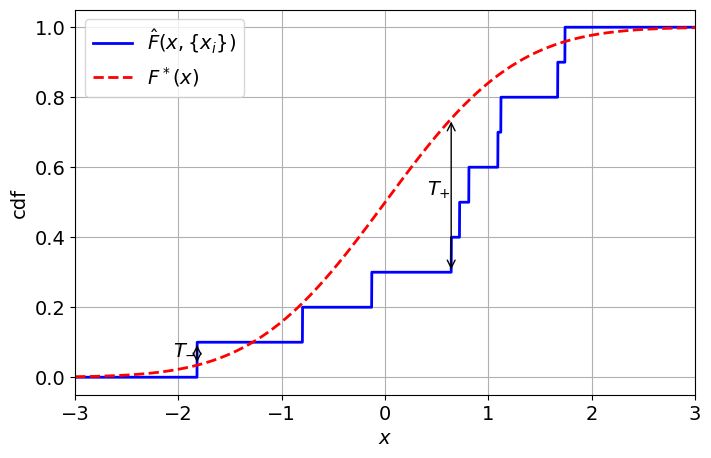

In [8]:
plt.plot(x_x,Fhat_x,'b-',lw=2,label=r'$\hat{F}(x,\{x_i\})$'); plt.plot(x_x,Fstar_x,'r--',lw=2,label=r'$F^*(x)$');plt.text(x_x[xp],(Fstar_x+Fhat_x)[xp]/2,r'$T_{+}$',ha='right');plt.annotate('',xy=(x_x[xp],Fstar_x[xp]),xycoords='data',xytext=(x_x[xp],Fhat_x[xp]),textcoords='data',arrowprops=dict(arrowstyle='<->'));plt.text(x_x[xm],(Fstar_x+Fhat_x)[xm]/2,r'$T_{-}$',ha='right');plt.annotate('',xy=(x_x[xm],Fstar_x[xm]),xycoords='data',xytext=(x_x[xm],Fhat_x[xm]),textcoords='data',arrowprops=dict(arrowstyle='<->'));plt.xlabel(r'$x$');plt.ylabel('cdf');plt.legend(loc='upper left');plt.grid();plt.xlim(xmin,xmax);

In [9]:
max(Fstar_x-Fhat_x),x_x[xp+1], max(Fhat_x-Fstar_x), x_x[xm] 

(0.4385885340551385, 0.6400000000000001, 0.06562049755411004, -1.82)

We’ve indicated on the plot the location of $T^{+}$ and $T^{-}$ on the plot. We notice
that $T^{+} =
\sup_x[F^*(x)-\hat{F}(x;\{x_i\})]\approx 0.439$
occurs right before the data point $x_i=0.64$ and $T^{-} =
\sup_x[\hat{F}(x;\{x_i\})-F^*(x)]\approx 0.066$ occurs right at the data point $x_i=-1.82$.

For continuous hypothesized dists, min & max of
of $[F^*(x)-\hat{F}(x;\{x_i\})]$ occurs the data points, where the edf
$\hat{F}(x;\{x_i\})$ jumps. $T^{-}$
occurs right after a jump & $T^{+}$ right before a jump. Don’t actually need to check the cdfs for all $x$ values, only
those right before and after actual data points:

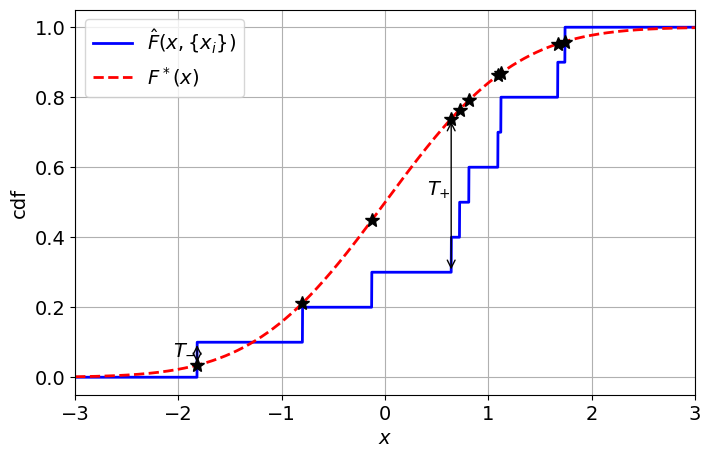

In [10]:
xsort_i = np.sort(x_i); Fstar_i = stats.norm.cdf(xsort_i);  plt.plot(x_x,Fhat_x,'b-',lw=2,label=r'$\hat{F}(x,\{x_i\})$');
plt.plot(x_x,Fstar_x,'r--',lw=2,label=r'$F^*(x)$');plt.plot(xsort_i,Fstar_i,'k*',ms=10);
plt.text(x_x[xp],(Fstar_x+Fhat_x)[xp]/2,r'$T_{+}$',ha='right');plt.annotate('',xy=(x_x[xp],Fstar_x[xp]),xycoords='data',xytext=(x_x[xp],Fhat_x[xp]),textcoords='data',arrowprops=dict(arrowstyle='<->'));
plt.text(x_x[xm],(Fstar_x+Fhat_x)[xm]/2,r'$T_{-}$',ha='right');plt.annotate('',xy=(x_x[xm],Fstar_x[xm]),xycoords='data',xytext=(x_x[xm],Fhat_x[xm]),textcoords='data',arrowprops=dict(arrowstyle='<->'));
plt.xlabel(r'$x$');plt.ylabel('cdf');plt.legend(loc='upper left');plt.grid();plt.xlim(xmin,xmax);


Define two arrays for the edf $\hat{F}(x;\{x_i\})$: `Fhatp_i` is $\hat{F}(x^{(j)}-\epsilon;\{x_i\})=\frac{j-1}{n}$, used to calculate $T^{+}=\sup_x\left(F^*(x)-\hat{F}(x;\{x_i\})\right)$ (since $F^*(x)-\hat{F}(x;\{x_i\})$ is largest when $x$ is just below a value $x^{(j)}$ at which $\hat{F}(x;\{x_i\})$ jumps.  (Recall order statistics $\{x^{(i)}\}$ i.e., the data $\{x_i\}$ sorted in ascending order.)

In [11]:
n = len(x_i); Fhatp_i = np.arange(n)/n; Fhatp_i

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

`Fhatm_i` is used for calculating $T^{-}=\sup_x\left(\hat{F}(x;\{x_i\})-F^*(x)\right)$, and is $\hat{F}(x^{(j)})=\frac{j}{n}$ (since $\hat{F}(x;\{x_i\})-F^*(x)$ is largest when $x$ is at (or just above) a value $x^{(j)}$ at which $\hat{F}(x;\{x_i\})$ jumps. 

In [12]:
Fhatm_i = (1+np.arange(n))/n; Fhatm_i

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

We compare these to `Fstar_i` which is just the continuous hypothesized cdf $F^*(x^{(i)})$:

In [13]:
Fstar_i

array([0.0343795 , 0.2118554 , 0.44828321, 0.7389137 , 0.7642375 ,
       0.79102991, 0.86214343, 0.86864312, 0.95254032, 0.95907049])

We find, as before, that $F^*(x)-\hat{F}(x;\{x_i\})$ reaches its maximum of $0.439$ when $x$ is just below $0.64$, and $\hat{F}(x;\{x_i\})-F^*(x)$ reaches its maximum of $0.066$ when $x=-1.82$.

In [14]:
Tp=max(Fstar_i-Fhatp_i); Tp, xsort_i[np.argmax(Fstar_i-Fhatp_i)]

(0.43891370030713844, 0.64)

In [15]:
Tm=max(Fhatm_i-Fstar_i); Tm,xsort_i[np.argmax(Fhatm_i-Fstar_i)]

(0.06562049755411004, -1.82)

Note that this is more reliable than trying to evaluate $F^*(x)$ and $\hat{F}(x;\{x_i\})$ at a bunch of closely-chosen $x$ values, since the data points $\{x_i\}$ might fall between them.

## $p$-Value for Continuous Distributions

To get the $p$-value assocated with $T^{+}$ and/or $T^{-}$, we need to
consider their null distribution; for either statistic, the null
distribution is the Kolmogorov distribution, with a single parameter
$n$. This distribution has a number of forms and somewhat complicated
derivations,<span id="fm1">[<sup>1</sup>](#fn1) but conveniently it is implemented in scipy, so we can find the one-sided $p$-value associated with$T^{+}\approx
0.439$, and likewise with $T^{-}\approx 0.066$:

<span id="fn1">[<sup>1</sup>](#fm1) A relatively straightforward form appears in
Z. W. Birnbaum and Fred H. Tingey, *Annals of Mathematical Statistics*
**22**, 592 (1951),</span> available at
<http://dx.doi.org/10.1214/aoms/1177729550>:
$$P({\color{royalblue}{T^{\pm}}}{\mathbin{\ge}}t^{\pm})
  = t^{\pm}\sum_{j=0}^{[n(1-t^{\pm})]} \binom{n}{j}
  \left(1-t^{\pm}-\frac{j}{n}\right)^{n-j}
  \left(t^{\pm}+\frac{j}{n}\right)^{j-1}$$ where $[n(1-t^{\pm})]$ is the
largest integer less than or equal to $n(1-t^{\pm})$, and
$\binom{n}{j}=\frac{n!}{j!(n-j)!}$ is the usual binomial
<span><span>coëfficient</span></span>. Note that we can split out the
$j=0$ term in the sum and write $$
  \label{e:Ktail}
  P({\color{royalblue}{T^{\pm}}}{\mathbin{\ge}}t^{\pm})
  = (1-t^{\pm})^n +
  t^{\pm}\sum_{j=1}^{[n(1-t^{\pm})]} \binom{n}{j}
  \left(1-t^{\pm}-\frac{j}{n}\right)^{n-j}
  \left(t^{\pm}+\frac{j}{n}\right)^{j-1}
  \ ;$$ in this form, it’s apparent that
$P({\color{royalblue}{T^{\pm}}} \ge 0)=1$. We can understand that
$T^{+}$ and $T^{-}$ cannot be negative, since $\hat{F}(x;\{x_i\})$ will
be zero for $x$ below the lowest value in the sample (which means
$F^*(x)-\hat{F}(x;\{x_i\})$ cannot be negative everywhere) and
$\hat{F}(x;\{x_i\})$ will be one for $x$ above the highest value in the
sample (which means $\hat{F}(x;\{x_i\})-F^*(x)$ cannot be negative
everywhere).

In [16]:
stats.ksone(n).sf(Tp), stats.ksone(n).sf(Tm)

(0.014275830316232892, 0.8837313552371744)

And so the two-sided $p$-value is $0.028$, which indicates that these
data are not consistent, at the 3% level, with being sampled from a
standard normal distribution.

Incidentally, we can plot the tail probability for this sample size:

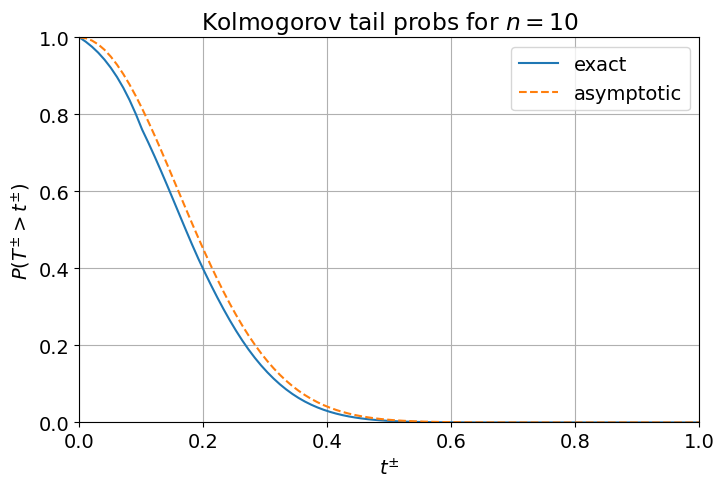

In [17]:
Tpm_t = np.linspace(0,1,100); tailprob_t = stats.ksone(n).sf(Tpm_t)
plt.plot(Tpm_t,tailprob_t,label='exact'); plt.plot(Tpm_t,np.exp(-2*n*Tpm_t**2),ls='--',label='asymptotic');
plt.legend(); plt.xlabel(r'$t^{\pm}$');plt.ylabel(r'$P(T^{\pm}>t^{\pm})$');plt.title(r'Kolmogorov tail probs for $n=%d$'%n);
plt.xlim(0,1);plt.ylim(0,1);plt.grid(True);

For large $n$ (more than about $40$), we can use the asymptotic
expression (also plotted above) $$P({\color{royalblue}{T^{\pm}}}{\mathbin{\ge}}t^{\pm})
  \approx e^{-2n(t^{\pm})^2}$$ Obviously, it won’t be good for $n=10$,
but we can check it:

In [18]:
Tp,stats.ksone(n).sf(Tp),np.exp(-2*n*Tp**2)

(0.43891370030713844, 0.014275830316232892, 0.021218014313645693)

and the one-sided $p$-value of 2.1% for $T^{\pm}=0.439$ is indeed a bit off from the exact value of 1.4%.  

The difference is not so easy to see on the linear scale, but it's more apparent if you plot the $p$-value logarithmically:

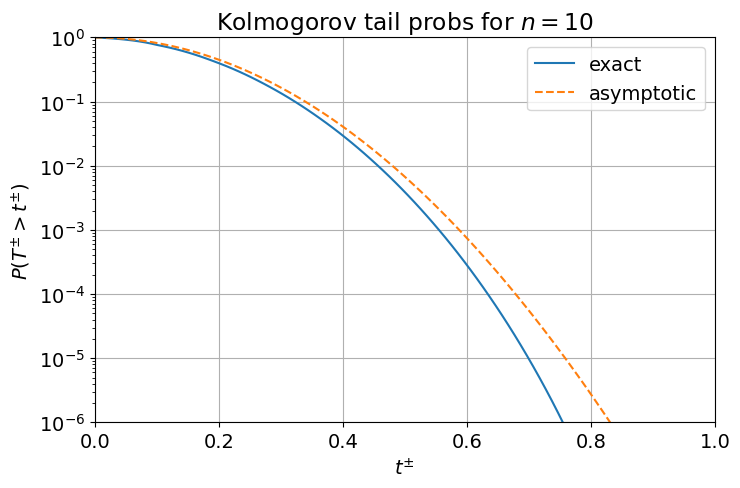

In [19]:
Tpm_t = np.linspace(0,1,100)
tailprob_t = stats.ksone(n).sf(Tpm_t)
plt.semilogy(Tpm_t,tailprob_t,label='exact'); plt.semilogy(Tpm_t,np.exp(-2*n*Tpm_t**2),ls='--',label='asymptotic');
plt.legend();plt.xlabel(r'$t^{\pm}$');plt.ylabel(r'$P(T^{\pm}>t^{\pm})$');plt.title(r'Kolmogorov tail probs for $n=%d$'%n);
plt.xlim(0,1);plt.ylim(1e-6,1);plt.grid(True);

## Distribution Confidence Interval

We can use the Kolmogorov test to define a confidence interval
associated with the point estimate $\hat{F}(x;\{x_i\})$. E.g., for a 95%
confidence interval, we should take the 97.5th percentile of the
Kolmogorov distribution, $t^{\pm}_{0.975}=t_{0.95}$, and set the ends of
the confidence interval as $$\hat{F}(x;\{x_i\}) \pm t_{0.95}
  \ ;$$ if the hypothesized cdf is within those limits, the empirical
cdf will be close enough that the $p$-value of the two-sided Kolmogorov
test will be above $5\%$. Of course, we also know that for *any* cdf,
$0\le F(x)\le 1$, so if the upper end of the interval goes above $1$, we
set it to $1$, and likewise if the lower end goes below zero.  We can get
the quantiles of the Kolmogorov distribution from SciPy or look them up,
e.g., in Table A13 of Conover.  So for example, that table says
that (for $n=10$) the threshold for a one-tailed test at the 97.5% level, or a
two-tailed test at 95%, is $0.409$, which is also the value that SciPy gives us:

In [20]:
T95 = stats.ksone(n).isf(0.025); T95

0.4092461395823648

Now we can construct and plot the confidence interval on the cdf:

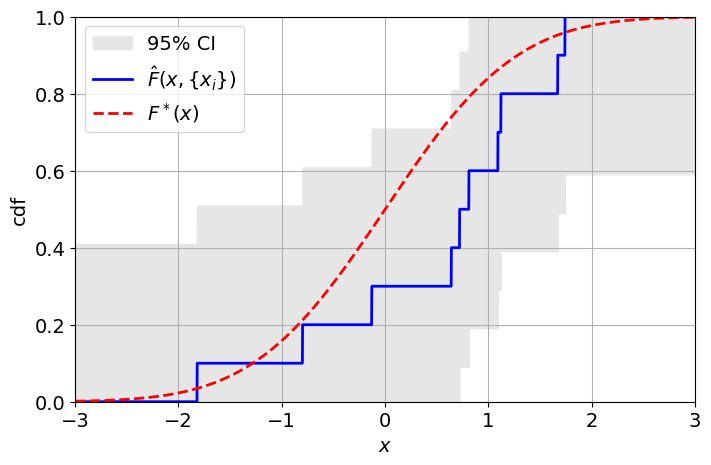

In [21]:
F95lower_x = np.maximum(0.,Fhat_x-T95); F95upper_x = np.minimum(1.,Fhat_x+T95)
plt.fill_between(x_x,F95upper_x,F95lower_x,edgecolor='b',color=[0.9,0.9,0.9],label=r'95% CI');
plt.plot(x_x,Fhat_x,'b-',lw=2,label=r'$\hat{F}(x,\{x_i\})$');plt.plot(x_x,Fstar_x,'r--',lw=2,label=r'$F^*(x)$');
plt.xlabel(r'$x$');plt.ylabel('cdf');plt.xlim(xmin,xmax);plt.ylim(0,1);plt.legend(loc='upper left');plt.grid();

Also: standard normal CDF for reference. it passes outside the region associated with the 95%
confidence interval, which we expect since we found a two-sided
$p$-value of $0.028<0.05$.

## $p$-Value for Discrete Distributions

The Kolomogorov distribution is only the correct null distribution for ${\color{royalblue}{T^{\pm}}}$ if the hypothesized distribution $F^*(x)$ is continuous.  (Because it assumes that $F({\color{royalblue}{X}})$ is a uniform random variable, which is clearly not the case if only some values of $F(x)$ are possible.) If it is discrete, the distribution of the Kolmogorov statistic depends on the specifics of $F(x)$.  Conover gives an algorithm for this in section 6.1, but it's very tricky to get right (especially given that floating point roundoff can mess up the computation of discrete values), so it's best to just use a Monte Carlo, which I believe is what the `dgof` (discrete goodness-of-fit tests) <https://cran.r-project.org/package=dgof> in R does.  Consider the example in Conover, where the hypothesized distribution is uniform over $x=\{1,2,3,4,5\}$ and the actual sample is (after ordering) $x^{(i)}=\{1,1,1,2,2,2,3,3,3,3\}$.  The hypothesized discrete cdf is
$$
F^*(x) =
\begin{cases}
0 & x<1 \\
0.2 & 1\le x < 2 \\
0.4 & 2\le x < 3 \\
0.6 & 3\le x < 4 \\
0.8 & 4\le x < 5 \\
1 & 5\le x
\end{cases}
$$
which is $x/5$ at each allowed value for ${\color{royalblue}{X}}$, and $(x-1)/5$ just below each of those values, and constant in between.

Since both $F^*(x)$ and $\hat{F}(x;\{x_i\})$ have discontinuous jumps, we have to be a bit careful about automating the calculation of the Kolmogorov statistics.  First, let's plot the cdfs.  We just need to evaluate the two cdfs at the possible values at $x$ and also just below the possible values:

In [22]:
discx_i = np.array([1,1,1,2,2,2,3,3,3,3]); discx_x = np.array([1,2,3,4,5]); discFstar_x = 0.2*discx_x
discFstarlow_x = 0.2*(discx_x-1); discFhat_x = np.mean(discx_i[None,:] <= discx_x[:,None],axis=-1)
discFhatlow_x = np.mean(discx_i[None,:] < discx_x[:,None],axis=-1)
discFstarlow_x, discFstar_x, discFhatlow_x, discFhat_x

(array([0. , 0.2, 0.4, 0.6, 0.8]),
 array([0.2, 0.4, 0.6, 0.8, 1. ]),
 array([0. , 0.3, 0.6, 1. , 1. ]),
 array([0.3, 0.6, 1. , 1. , 1. ]))

We now have pairs of discrete arrays, which we "interleave" to get an array of twice the length:

In [23]:
n_x = len(discx_x)
n_allx = 2*n_x
discx_allx = np.empty(n_allx,dtype = discx_x.dtype)
discx_allx[0::2] = discx_x
discx_allx[1::2] = discx_x
discx_allx

array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5])

In [24]:
discFstar_allx = np.empty(n_allx,dtype = discFstar_x.dtype)
discFstar_allx[0::2] = discFstarlow_x
discFstar_allx[1::2] = discFstar_x
discFstar_allx

array([0. , 0.2, 0.2, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1. ])

In [25]:
discFhat_allx = np.empty(n_allx,dtype = discFhat_x.dtype)
discFhat_allx[0::2] = discFhatlow_x
discFhat_allx[1::2] = discFhat_x
discFhat_allx

array([0. , 0.3, 0.3, 0.6, 0.6, 1. , 1. , 1. , 1. , 1. ])

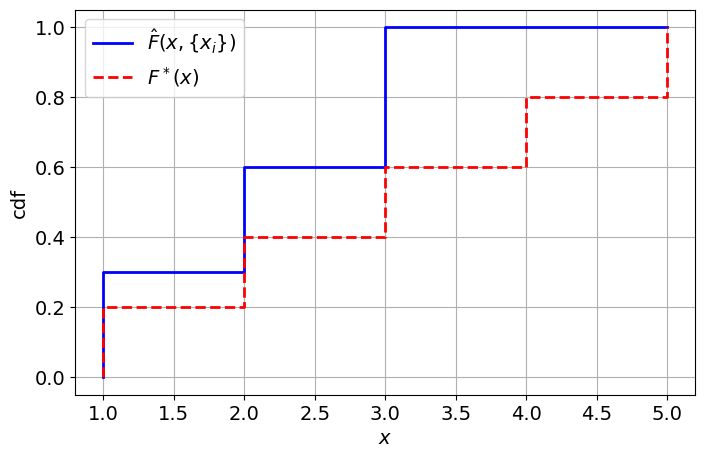

In [26]:
plt.plot(discx_allx,discFhat_allx,'b-',lw=2,label=r'$\hat{F}(x,\{x_i\})$');
plt.plot(discx_allx,discFstar_allx,'r--',lw=2,label=r'$F^*(x)$');
plt.xlabel(r'$x$');plt.ylabel('cdf');plt.legend(loc='upper left');plt.grid();

You can see pretty clearly by eye that $T^{+}=\sup_x\left(F^*(x)-\hat{F}(x;\{x_i\})\right)=0$ and $T^{-}=\sup_x\left(\hat{F}(x;\{x_i\})-F^*(x)\right)=0.4$, and also that these values occur not at single $x$ values, but continuously between pairs of possible $x$ values.

So we only need to check the statistic value in between $x$ values, or equivalently at each possible $x$ value (since we know that $F^*(x)=\hat{F}(x;\{x_i\})=1$ if $x$ is the maximum allowed value, and we need to include zero as a possible value in case all the others are negative, as in the case of $T^{+}$ in this example):

In [27]:
discTp = max(discFstar_x-discFhat_x); discTp

0.0

In [28]:
max(discFstar_allx-discFhat_allx)

0.0

In [29]:
discTm = max(discFhat_x-discFstar_x); discTm

0.3999999999999999

In [30]:
max(discFhat_allx-discFstar_allx)

0.3999999999999999

So actually the interleaving is only necessary to make a nice plot; in fact we can manage that with matplotlib's `step` function:

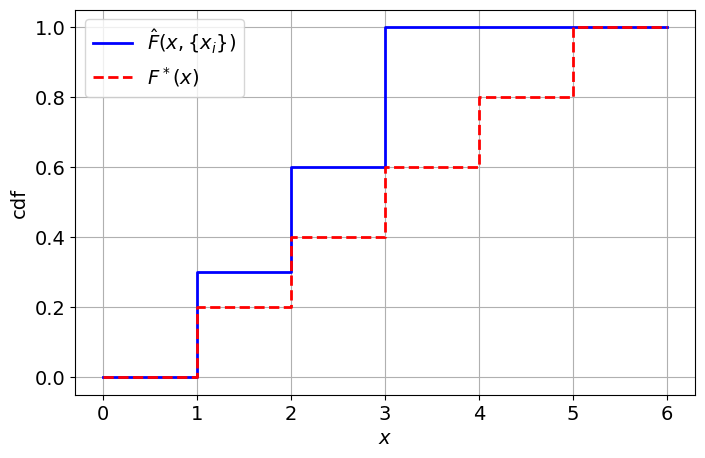

In [31]:
discx_plot = np.concatenate(([0],discx_x,[6])); discFhat_plot = np.concatenate(([0.],discFhat_x,[1.]))
discFstar_plot = np.concatenate(([0.],discFstar_x,[1.]))
plt.step(discx_plot,discFhat_plot,'b',where='post',lw=2,label=r'$\hat{F}(x,\{x_i\})$');
plt.step(discx_plot,discFstar_plot,'r',linestyle='--',where='post',lw=2,label=r'$F^*(x)$');
plt.xlabel(r'$x$');plt.ylabel('cdf');plt.legend(loc='upper left');plt.grid(True);

One more thing to watch out for is that roundoff error has made our calculated $t^{-}$ value not quite equal to its discrete value of $0.4$:

In [32]:
max(discFhat_x-discFstar_x)

0.3999999999999999

Now, we know that in this case, the only possible values of $T^{\pm}$ are integer multiples of $0.1$, or in general integer multiples of $\frac{1}{5n}$, but the discrete values of $F^*(x)$ will not always be so simple to describe, so the easiest thing is just to round off to, say, 8 decimal places<span id="fm3">[<sup>3</sup>](#fn3), which is a lot bigger than the floating point roundoff:

<span id="fn3">[<sup>3</sup>](#fm3) Of course, not every rounded decimal is exactly representable in floating point, but if we do the same rounding on all of the statistics after we compute them, we can ensure that the unique values should be the same.</span>

In [33]:
discTm = np.round(max(discFhat_x-discFstar_x),8); discTm

0.4

In [34]:
discTp = np.round(max(discFstar_x-discFhat_x),8); discTp

0.0

So anyway we have $t^{+}=0.0$ and $t=t^{-}=0.4$.  We could use Conover's method to get the associated $p$-value, but instead we'll do a Monte Carlo.  Note that with $n=10$ data points and five possible values, there are $5^{10}=9,765,625$ possible data sets, which happen (in this case) to be equally likely.  Rather than enumerating those, we'll do a slightly smaller Monte Carlo:

In [35]:
np.random.seed(20191021); Nmonte = 10**4; discn = len(discx_i)
discx_Ii = stats.randint(1,5+1).rvs(size=(Nmonte,discn))
5**n

9765625

A sanity check that we got the parameters of the discrete uniform distribution right.  (We could also make a histogram to check if we really wanted to be sure.)

In [36]:
np.min(discx_Ii), np.max(discx_Ii)

(1, 5)

In [37]:
discFhat_Ix = np.mean(discx_Ii[:,None,:] <= discx_x[None,:,None],axis=-1)
discFhat_Ix.shape

(10000, 5)

Now we calculate the statistic $T^{+}{}^{(I)}$ for each Monte Carlo iteration.  We show the pitfall that occurs again if we ignore floating point roundoff:

In [38]:
discTp_I = np.max(discFstar_x[None,:]-discFhat_Ix,axis=-1)
np.unique(discTp_I)

array([0.00000000e+00, 1.11022302e-16, 1.00000000e-01, 1.00000000e-01,
       1.00000000e-01, 2.00000000e-01, 2.00000000e-01, 3.00000000e-01,
       3.00000000e-01, 4.00000000e-01, 4.00000000e-01, 5.00000000e-01,
       5.00000000e-01])

And how it can be resolved:

In [39]:
discTp_I = np.around(np.max(discFstar_x[None,:]-discFhat_Ix,axis=-1),8)
np.unique(discTp_I)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

We do likewise with $T^{-}{}^{(I)}$:

In [40]:
discTm_I = np.max(discFhat_Ix-discFstar_x[None,:],axis=-1)
np.unique(discTm_I)

array([0. , 0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.6,
       0.6])

In [41]:
discTm_I = np.around(np.max(discFhat_Ix-discFstar_x[None,:],axis=-1),8)
np.unique(discTm_I)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

These are the unique values of $T^{\pm}$ occurring in the Monte Carlo:

In [42]:
discT_T = np.unique(np.concatenate((discTm_I,discTp_I))); discT_T

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

We see empirically that the null distributions of ${\color{royalblue}{T^{+}}}$ and ${\color{royalblue}{T^{-}}}$ are the same to within Monte Carlo error (considering e.g., $\sqrt{3600}\approx 60$).  Conover asserts that this is always true when the hypothesized distribution (in this case uniform) is symmetric.

In [43]:
NTp_T = np.sum(discTp_I[None,:]==discT_T[:,None],axis=-1)
NTp_T, np.sum(NTp_T)

(array([3415, 3186, 2386,  809,  178,   26,    0]), 10000)

In [44]:
NTm_T = np.sum(discTm_I[None,:]==discT_T[:,None],axis=-1)
NTm_T, np.sum(NTm_T)

(array([3540, 3229, 2230,  783,  197,   18,    3]), 10000)

So now we can calculate the $p$-value corresponding to $t^{-}=0.4$, first noting that, of course, the one-sided $p$-value for $t^{+}=0$ is $1$:

In [45]:
np.mean(discTp_I >= discTp)

1.0

In [46]:
np.mean(discTm_I >= discTm)

0.0218

In [47]:
np.mean(discTm_I >= 0.4)

0.0218

Since the ${\color{royalblue}{T^{+}}}$ and ${\color{royalblue}{T^{-}}}$ distributions are the same, we could also use the other Monte Carlo ensemble:

In [48]:
np.mean(discTp_I >= 0.4)

0.0204

Or use both together to say we're looking at a one-sided $p$-value of about $0.021$, or a two-sided $p$-value for $t=0.4$ of $0.042$.  This is in fact the value computed with an analytical formula by Conover.  Note that the Kolmogorov distribution gives a $p$-value of $0.030$ (one-sided) or $0.059$ (two-sided) so neglecting discrete effects would overestimate the $p$-value and in fact produce a different result for a test with $\alpha=0.05$ (as noted in Conover using the values in his Tale A13).

In [49]:
stats.ksone(discn).sf(discTm)

0.02949469039999999

In [50]:
2*stats.ksone(discn).sf(discTm)

0.05898938079999998

Note that the SciPy `kstest` routine uses the continuous formula:

In [51]:
stats.kstest(discx_i,stats.randint(1,5+1).cdf)

KstestResult(statistic=0.4, pvalue=0.05898924519999926, statistic_location=3, statistic_sign=1)